In [ ]:
# !pip install xgboost

In [70]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dropout, Flatten
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pickle
import os
import shutil
import boto3
import sagemaker
from sagemaker import get_execution_role
warnings.filterwarnings("ignore") 

In [71]:
sagemaker_session = sagemaker.Session()


s3_prefix = "sagemaker/api"  

role = sagemaker.get_execution_role() 

region = sagemaker_session.boto_region_name

bucket = sagemaker_session.default_bucket()

s3_data_path = f"{bucket}/{s3_prefix}/data"
s3_output_path = f"{bucket}/{s3_prefix}/output"
print(s3_data_path)

sagemaker-ap-south-1-757776451407/sagemaker/api/data


In [72]:
df = pd.read_csv('output_file.csv')
# df = df.drop(['Unnamed: 7'],axis=1)

In [73]:
# from datetime import datetime
# DateTime = []
# for x in df['time']:
#     DateTime.append(datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'))
# datetime = pd.Series(DateTime)
# df.index = datetime

# df = df.drop(['time.1'],axis=1)
df.head()

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
0,2021-11-01 00:00,2.100013,207.79967,21544.232,288.35187,278.53552,88.662880
1,2021-11-01 00:20,1.494543,195.41899,22789.700,289.25757,278.40363,85.743430
2,2021-11-01 00:40,1.203924,205.38362,26924.135,293.32623,278.90930,66.800240
3,2021-11-01 01:00,0.787564,204.74925,28133.807,297.54370,279.38147,53.934402
4,2021-11-01 01:20,1.840468,187.68733,29133.484,300.45508,278.62110,36.173420


In [74]:
print(df.dtypes)

time            object
Wind_speed     float64
Wind_dir       float64
Visibility     float64
Temperature    float64
dewpoint       float64
Humidity       float64
dtype: object


In [75]:
df.isnull().sum()

time           0
Wind_speed     0
Wind_dir       0
Visibility     0
Temperature    0
dewpoint       0
Humidity       0
dtype: int64

In [76]:
# for ind in df.index:
#     #kelvin to celcius conversion 
#     df['Temperature'][ind] = df['Temperature'][ind]- 273.15
#     # df['Dew_point'][ind] = df['Dew_point'][ind]- 273.15
#     # #knotts to meter conversion 
#     # df['Dew_point'][ind] = df['Dew_point'][ind]*0.514444
    
# df.head()

In [77]:
df['time']=pd.to_datetime(df['time'])
df.head()

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
0,2021-11-01 00:00:00,2.100013,207.79967,21544.232,288.35187,278.53552,88.662880
1,2021-11-01 00:20:00,1.494543,195.41899,22789.700,289.25757,278.40363,85.743430
2,2021-11-01 00:40:00,1.203924,205.38362,26924.135,293.32623,278.90930,66.800240
3,2021-11-01 01:00:00,0.787564,204.74925,28133.807,297.54370,279.38147,53.934402
4,2021-11-01 01:20:00,1.840468,187.68733,29133.484,300.45508,278.62110,36.173420


In [78]:
#from datetime import datetime
df['date']=df['time'].dt.day
df['month']=df['time'].dt.month
df['hour']=df['time'].dt.hour
df['min']=df['time'].dt.minute
df.head()

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity,date,month,hour,min
0,2021-11-01 00:00:00,2.100013,207.79967,21544.232,288.35187,278.53552,88.662880,1,11,0,0
1,2021-11-01 00:20:00,1.494543,195.41899,22789.700,289.25757,278.40363,85.743430,1,11,0,20
2,2021-11-01 00:40:00,1.203924,205.38362,26924.135,293.32623,278.90930,66.800240,1,11,0,40
3,2021-11-01 01:00:00,0.787564,204.74925,28133.807,297.54370,279.38147,53.934402,1,11,1,0
4,2021-11-01 01:20:00,1.840468,187.68733,29133.484,300.45508,278.62110,36.173420,1,11,1,20


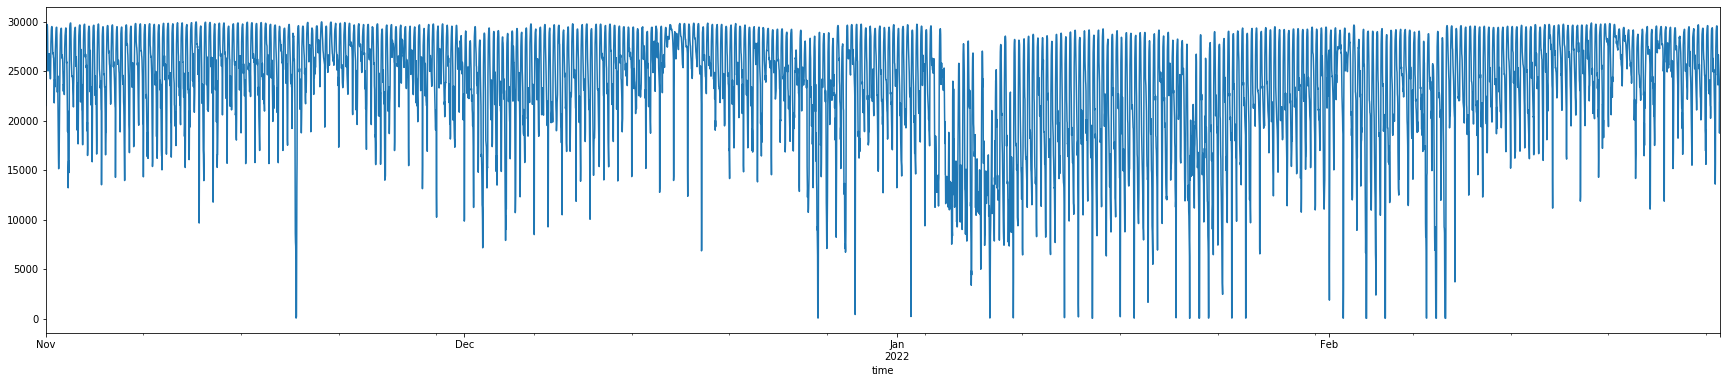

In [79]:
from matplotlib.pyplot import figure
figure(figsize=(30, 6))
ddd=df
ddd.groupby('time')['Visibility'].median().plot()

In [80]:
# df1 = df
col=['time','Visibility']
# new_df= df1.drop(columns=col)
# df_for_training = new_df.astype(float)
# df_for_training.head(10)

In [81]:
date_time = pd.to_datetime(df.pop('time'), format='%d.%m.%Y %H:%M:%S')

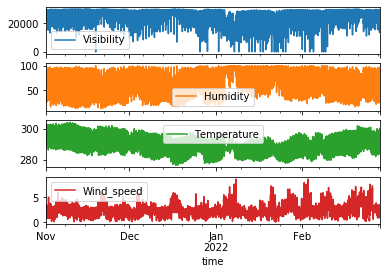

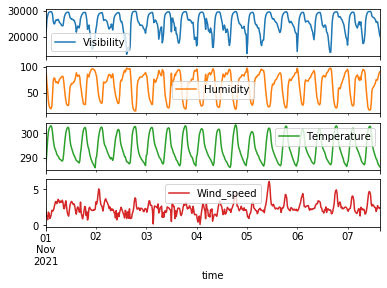

In [82]:
plot_cols = ['Visibility', 'Humidity', 'Temperature','Wind_speed']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wind_speed,8639.0,2.449192,1.077667,0.040244,1.821636,2.287039,2.831864,8.69690
Wind_dir,8639.0,219.289236,88.239025,0.208429,140.548165,249.311500,285.479010,359.99265
Visibility,8639.0,23663.605664,5660.564430,47.064730,20919.442500,25163.307000,28172.606000,29984.44100
Temperature,8639.0,288.713726,5.543365,276.257320,284.667700,287.915830,292.382740,304.04877
dewpoint,8639.0,279.267334,2.640787,272.045620,277.556950,279.563720,281.179410,286.08057
Humidity,8639.0,70.331718,23.591963,13.082347,53.221351,77.724230,89.708857,100.03035
date,8639.0,15.523556,8.697636,1.000000,8.000000,15.000000,23.000000,31.00000
month,8639.0,6.575530,5.041280,1.000000,1.000000,11.000000,12.000000,12.00000
hour,8639.0,11.498669,6.921882,0.000000,5.500000,11.000000,17.000000,23.00000
min,8639.0,19.997685,16.330404,0.000000,0.000000,20.000000,40.000000,40.00000


Text(0, 0.5, 'Wind Velocity [m/s]')

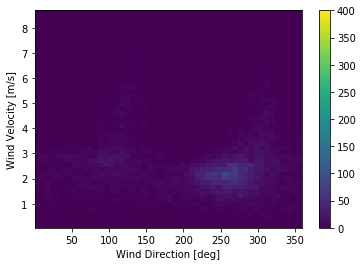

In [84]:
plt.hist2d(df['Wind_dir'], df['Wind_speed'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [85]:
wv = df.pop('Wind_speed')

# Convert to radians.
wd_rad = df.pop('Wind_dir')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# # Calculate the max wind x and y components.
# df['max Wx'] = max_wv*np.cos(wd_rad)
# df['max Wy'] = max_wv*np.sin(wd_rad)

(-6.653327972562112, 5.838237658685071, -6.385543838571652, 7.076529755474575)

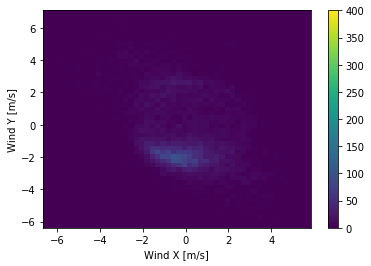

In [86]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [87]:
df_test=pd.read_csv('train.txt',   delim_whitespace=True,encoding="latin-1" )

df_test.columns =['time', 'Wind_speed', 'Wind_dir', 'Visibility' ,'Temperature' ,'dewpoint']
df_test.head()
df_test.isnull().sum()

time             0
Wind_speed     269
Wind_dir       269
Visibility     270
Temperature    270
dewpoint       270
dtype: int64

In [88]:
df_test['Wind_speed'].fillna(df_test['Wind_speed'].median(), inplace = True)
# df_test['Wind_dir'].fillna(df_test['Wind_dir'].median(), inplace = True)
df_test['Wind_dir'].fillna(method ='pad' ,inplace = True)
df_test['Visibility'].fillna(df_test['Visibility'].median(), inplace = True)
df_test['Temperature'].fillna(df_test['Temperature'].median(), inplace = True)
df_test['dewpoint'].fillna(df_test['dewpoint'].median(), inplace = True)

df_test.head(10)

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint
0,20201101_0100Z,0.0,000,1000.0,15.0,10.0
1,20201101_0200Z,0.0,000,800.0,14.0,10.0
2,20201101_0300Z,0.0,000,1200.0,17.0,10.0
3,20201101_0400Z,4.0,250,1300.0,20.0,10.0
4,20201101_0500Z,5.0,260,1300.0,23.0,9.0
5,20201101_0600Z,6.0,280,1800.0,25.0,8.0
6,20201101_0700Z,3.0,280,1500.0,16.0,10.0
7,20201101_0800Z,10.0,290,3500.0,30.0,9.0
8,20201101_0900Z,8.0,290,3500.0,30.0,6.0
9,20201101_1000Z,8.0,300,3500.0,30.0,6.0


In [89]:
#computing humidity values
relhum = []
import math
for ind in df_test.index:
    relhum.append(100*(math.exp((17.625*df_test['dewpoint'][ind])/(243.04+df_test['dewpoint'][ind]))/math.exp((17.625*df_test['Temperature'][ind])/(243.04+df_test['Temperature'][ind]))))
df_test['Humidity'] = relhum    

In [90]:
# pd.to_datetime('20201101 0100')

In [91]:
#data cleaning and conversion 
for ind in df_test.index:
    #kelvin to celcius conversion 
    # df_test['Temperature'][ind] = abs(df_test['Temperature'][ind]- 273.15)
    # df_test['dewpoint'][ind] = abs(df_test['dewpoint'][ind]- 273.15)
    # #knotts to meter conversion 
    df_test['Wind_speed'][ind] = df_test['Wind_speed'][ind]*0.514444
    df_test['time'][ind] = str(df_test['time'][ind]).replace('_', ' ')[:-1]
    if df_test['Wind_dir'][ind] == 'VRB':
        df_test['Wind_dir'][ind]= 000

df_test.head()
  


,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
0,20201101 0100,0.000000,000,1000.0,15.0,10.0,72.034842
1,20201101 0200,0.000000,000,800.0,14.0,10.0,76.840593
2,20201101 0300,0.000000,000,1200.0,17.0,10.0,63.400630
3,20201101 0400,2.057776,250,1300.0,20.0,10.0,52.541326
4,20201101 0500,2.572220,260,1300.0,23.0,9.0,40.886402


In [92]:
# from datetime import datetime
# DateTime = []
# for x in df_test['time']:
#     DateTime.append(datetime.strptime(str(x),'%Y%m%d %H%M%S'))
# datetime = pd.Series(DateTime)
# df_test.index = datetime

# df = df.drop(['time.1'],axis=1)
df_test.head()

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
0,20201101 0100,0.000000,000,1000.0,15.0,10.0,72.034842
1,20201101 0200,0.000000,000,800.0,14.0,10.0,76.840593
2,20201101 0300,0.000000,000,1200.0,17.0,10.0,63.400630
3,20201101 0400,2.057776,250,1300.0,20.0,10.0,52.541326
4,20201101 0500,2.572220,260,1300.0,23.0,9.0,40.886402


In [30]:
df_test['time']=pd.to_datetime(df_test['time'])
df_test['month']=df_test['time'].dt.minute
df_test['date']=df_test['time'].dt.day
df_test['month']=df_test['time'].dt.month
df_test['hour']=df_test['time'].dt.hour

df_test.head(10)

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity,month,date,hour
0,2020-11-01 01:00:00,0.000000,000,1000.0,15.0,10.0,72.034842,11,1,1
1,2020-11-01 02:00:00,0.000000,000,800.0,14.0,10.0,76.840593,11,1,2
2,2020-11-01 03:00:00,0.000000,000,1200.0,17.0,10.0,63.400630,11,1,3
3,2020-11-01 04:00:00,2.057776,250,1300.0,20.0,10.0,52.541326,11,1,4
4,2020-11-01 05:00:00,2.572220,260,1300.0,23.0,9.0,40.886402,11,1,5
5,2020-11-01 06:00:00,3.086664,280,1800.0,25.0,8.0,33.884439,11,1,6
6,2020-11-01 07:00:00,1.543332,280,1500.0,16.0,10.0,67.563333,11,1,7
7,2020-11-01 08:00:00,5.144440,290,3500.0,30.0,9.0,27.058607,11,1,8
8,2020-11-01 09:00:00,4.115552,290,3500.0,30.0,6.0,22.049090,11,1,9
9,2020-11-01 10:00:00,4.115552,300,3500.0,30.0,6.0,22.049090,11,1,10


In [93]:
df_test = df_test.drop(columns=col)

In [94]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):]
test_df = df_test

num_features = df.shape[1]

In [95]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

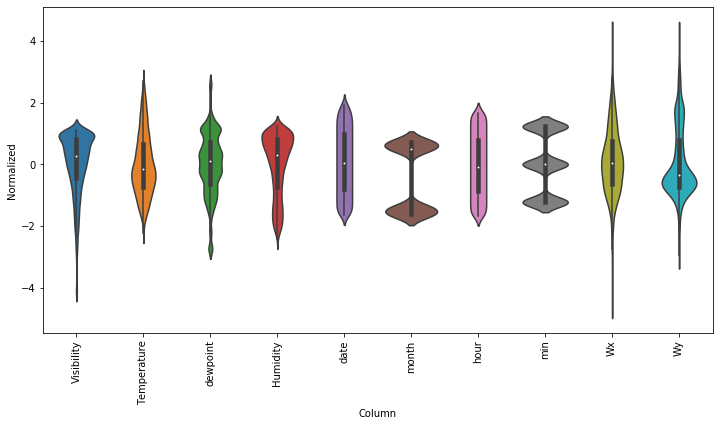

In [96]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [97]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [98]:
w1 = WindowGenerator(input_width=73, label_width=1, shift=72,
                     label_columns=['Visibility'])
w1

Total window size: 145
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Label indices: [144]
Label column name(s): ['Visibility']

In [99]:
w2 = WindowGenerator(input_width=73, label_width=1, shift=72,
                     label_columns=['Visibility'])
w2

Total window size: 145
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Label indices: [144]
Label column name(s): ['Visibility']

In [100]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [101]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])
                          ])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 145, 10)
Inputs shape: (3, 73, 10)
Labels shape: (3, 1, 1)


In [102]:
w2.example = example_inputs, example_labels


In [103]:
def plot(self, model=None, plot_col='Visibility', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

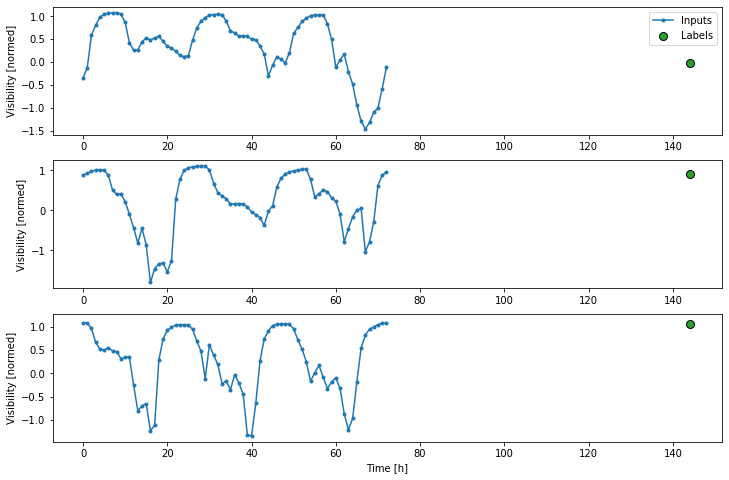

In [104]:
w2.plot()

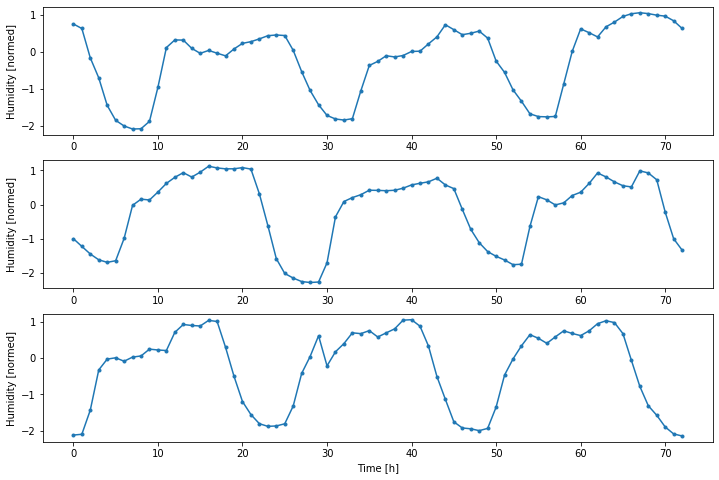

In [105]:
w2.plot(plot_col='Humidity')

In [106]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [107]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [108]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 73, 10), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [109]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 73, 10)
Labels shape (batch, time, features): (32, 1, 1)


Total window size: 144
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Label indices: [ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
Label column name(s): None

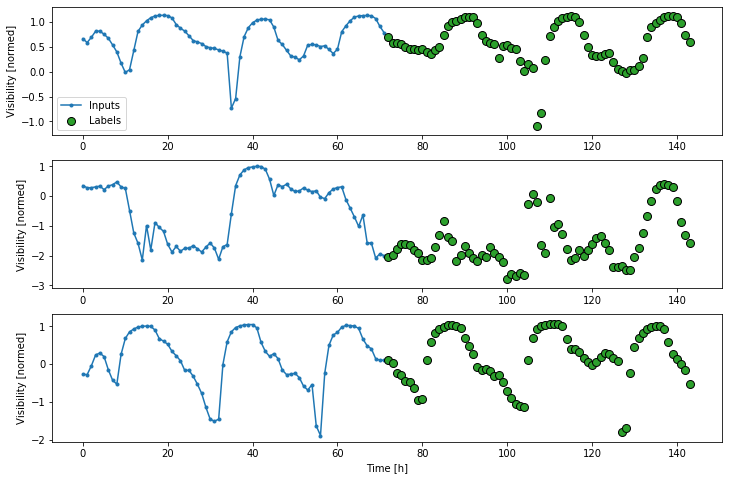

In [110]:
OUT_STEPS = 72
# multi_window.example = example_inputs, example_labels
multi_window = WindowGenerator(input_width=72,
                               label_width=OUT_STEPS,
                               shift=72)

multi_window.plot()
multi_window

77/77 [==============================] - 0s 4ms/step - loss: 1.5708 - mean_absolute_error: 0.8743


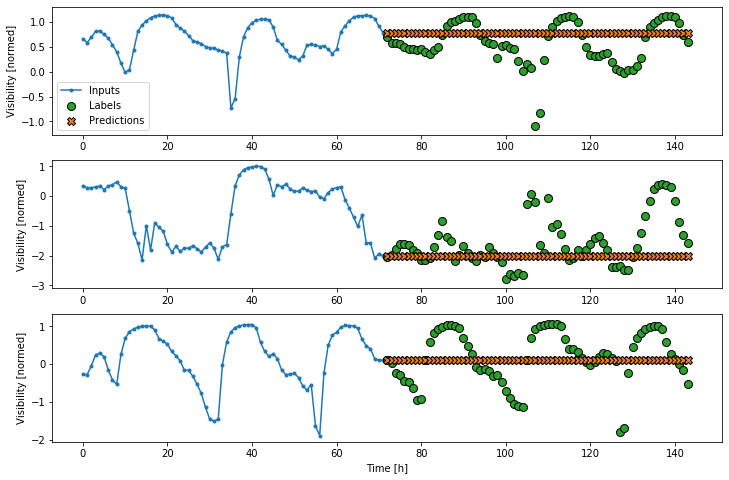

In [111]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

77/77 [==============================] - 0s 4ms/step - loss: 0.5983 - mean_absolute_error: 0.3477


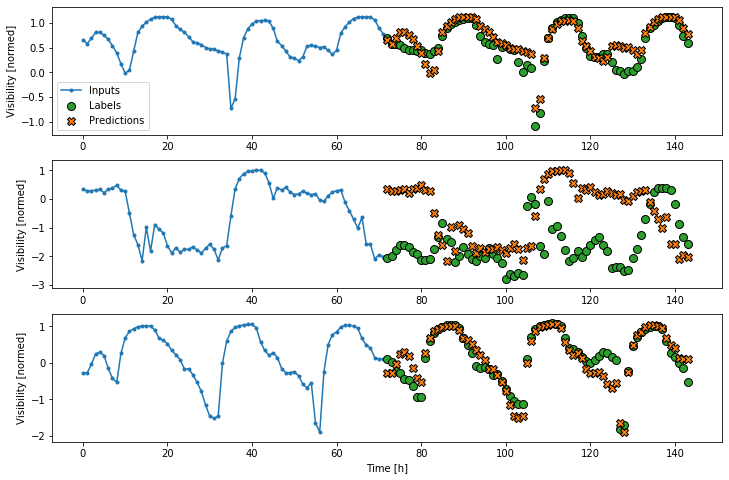

In [112]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

Epoch 1/20
185/185 [==============================] - 2s 6ms/step - loss: 0.8370 - mean_absolute_error: 0.7463 - val_loss: 1.0523 - val_mean_absolute_error: 0.8425
Epoch 2/20
185/185 [==============================] - 1s 5ms/step - loss: 0.6794 - mean_absolute_error: 0.6626 - val_loss: 0.9617 - val_mean_absolute_error: 0.7992
Epoch 3/20
185/185 [==============================] - 1s 5ms/step - loss: 0.6099 - mean_absolute_error: 0.6182 - val_loss: 0.9066 - val_mean_absolute_error: 0.7672
Epoch 4/20
185/185 [==============================] - 1s 5ms/step - loss: 0.5715 - mean_absolute_error: 0.5876 - val_loss: 0.8702 - val_mean_absolute_error: 0.7388
Epoch 5/20
185/185 [==============================] - 1s 5ms/step - loss: 0.5489 - mean_absolute_error: 0.5645 - val_loss: 0.8457 - val_mean_absolute_error: 0.7134
Epoch 6/20
185/185 [==============================] - 1s 5ms/step - loss: 0.5354 - mean_absolute_error: 0.5466 - val_loss: 0.8299 - val_mean_absolute_error: 0.6913
Epoch 7/20
185/1

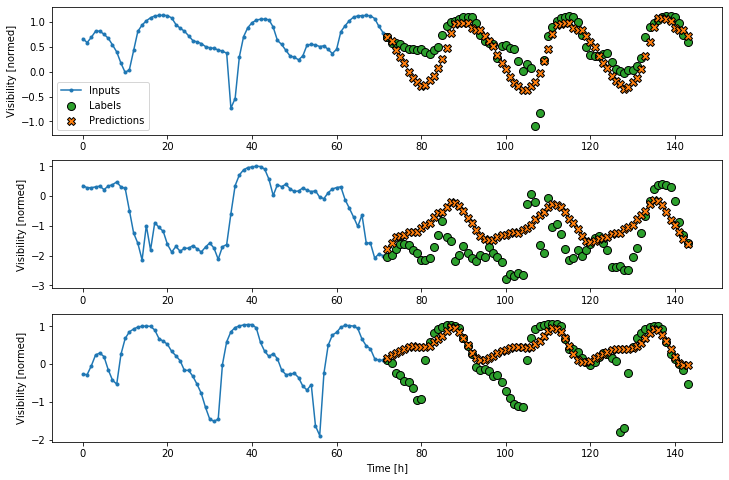

In [113]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

# IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
# multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

In [52]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

# IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
# multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

NameError: name 'compile_and_fit' is not defined

In [54]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
# multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

NameError: name 'compile_and_fit' is not defined

In [55]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
# multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

NameError: name 'compile_and_fit' is not defined

In [56]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [57]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [58]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [59]:
prediction, state = feedback_model.warmup(multi_window.example[0])
# print(prediction)*train_std*(test_df + train_mean) 
prediction.shape

TensorShape([32, 10])

In [60]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [61]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]))

Output shape (batch, time, features):  tf.Tensor(
[[[ 6.17935248e-02  3.84922437e-02  7.78982282e-01 ... -1.62475795e-01
    1.39179528e-01 -2.45606408e-01]
  [ 8.68734047e-02  2.15867814e-02  5.62633514e-01 ... -1.61285520e-01
    1.97962135e-01 -1.23185761e-01]
  [ 8.67602900e-02  3.96517105e-02  4.33576375e-01 ... -1.56726092e-01
    1.83320597e-01 -1.33069441e-01]
  ...
  [ 1.54836780e-05  1.57217028e-06  3.65812048e-05 ...  1.79433973e-05
    1.56790466e-05 -2.68825734e-05]
  [ 1.25040342e-05 -2.14366310e-06  3.25685978e-05 ...  1.54228528e-05
    1.92744901e-05 -2.40014724e-05]
  [ 9.84864982e-06 -5.00281794e-06  2.86196519e-05 ...  1.30714898e-05
    2.16167537e-05 -2.11475544e-05]]

 [[ 1.54740825e-01 -1.57369867e-01 -3.06674540e-01 ...  4.74034786e-01
    3.53105366e-02 -7.36341923e-02]
  [ 1.67612121e-01 -1.88925087e-01 -1.45181611e-01 ...  3.97131383e-01
    2.62483470e-02  4.55060676e-02]
  [ 1.17592625e-01 -1.54687047e-01 -7.13872910e-02 ...  3.38374853e-01
   -7.48753315e

In [62]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [63]:
history = compile_and_fit(feedback_model, multi_window)

# IPython.display.clear_output()
# multi_val_performance = {}
# multi_performance = {}
multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
# multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, Verbose=0)
multi_window.plot(feedback_model)Verbose=0)
multi_window.plot(feedback_model)


SyntaxError: invalid syntax (<ipython-input-63-1fd58862850c>, line 8)

In [64]:
feedback_model(multi_window.example[0])


<tf.Tensor: shape=(32, 72, 10), dtype=float32, numpy=
array([[[ 6.17935248e-02,  3.84922437e-02,  7.78982282e-01, ...,
         -1.62475795e-01,  1.39179528e-01, -2.45606408e-01],
        [ 8.68734047e-02,  2.15867814e-02,  5.62633514e-01, ...,
         -1.61285520e-01,  1.97962135e-01, -1.23185761e-01],
        [ 8.67602900e-02,  3.96517105e-02,  4.33576375e-01, ...,
         -1.56726092e-01,  1.83320597e-01, -1.33069441e-01],
        ...,
        [ 1.54836780e-05,  1.57217028e-06,  3.65812048e-05, ...,
          1.79433973e-05,  1.56790466e-05, -2.68825734e-05],
        [ 1.25040342e-05, -2.14366310e-06,  3.25685978e-05, ...,
          1.54228528e-05,  1.92744901e-05, -2.40014724e-05],
        [ 9.84864982e-06, -5.00281794e-06,  2.86196519e-05, ...,
          1.30714898e-05,  2.16167537e-05, -2.11475544e-05]],

       [[ 1.54740825e-01, -1.57369867e-01, -3.06674540e-01, ...,
          4.74034786e-01,  3.53105366e-02, -7.36341923e-02],
        [ 1.67612121e-01, -1.88925087e-01, -1.451

In [65]:
x = 
# print(multi_performance)
width = 0.3

metric_name = 'mean_absolute_error'
metric_index =0
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(10, val_mae, width, label='Validation')
plt.bar(10, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

SyntaxError: invalid syntax (<ipython-input-65-6bc763224e23>, line 1)

In [66]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : nan
Repeat  : nan
